**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**

---


# Introduction

You are a bird conservation expert and want to understand migration patterns of purple martins.  In your research, you discover that these birds typically spend the summer breeding season in the eastern United States, and then migrate to South America for the winter.  But since this bird is under threat of endangerment, you'd like to take a closer look at the locations that these birds are more likely to visit.

<center>
<img src="https://i.imgur.com/qQcS0KM.png" width="1000"><br/>
</center>

There are several [protected areas](https://www.iucn.org/theme/protected-areas/about) in South America, which operate under special regulations to ensure that species that migrate (or live) there have the best opportunity to thrive.  You'd like to know if purple martins tend to visit these areas.  To answer this question, you'll use some recently collected data that tracks the year-round location of eleven different birds.

Before you get started, run the code cell below to set everything up.

關於地圖投影法 
動機 : 地圖投影是2D的，但地球是3D的，換句話說，2D投影會有一些誤導
因此有各式各樣的投影法
兩個最常用的 : 
1. 等面積投影(equal-area projection)，當你需要計算某個效應的影響面積，或是某個城市的面積，這會很有用
2. 等距離投影(equidistant projections，舉例 方位角等距投影(Azimuthal Equidistant projection"))，當你需要計算例如航線距離，A點到B點的球面距離，但你擁有的是地圖數據時，這會很有用

各種投影法的集合被稱為座標參考系統(coordinate reference system, CRS)

In [74]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex2 import *

# Exercises

### 1) Load the data.

Run the next code cell (without changes) to load the GPS data into a pandas DataFrame `birds_df`.  

In [75]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("../input/geospatial-learn-course-data/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


There are 11 birds in the dataset, where each bird is identified by a unique value in the "tag-local-identifier" column.  Each bird has several measurements, collected at different times of the year.

Use the next code cell to create a GeoDataFrame `birds`.  
- `birds` should have all of the columns from `birds_df`, along with a "geometry" column that contains Point objects with (longitude, latitude) locations.  
- Set the CRS of `birds` to `{'init': 'epsg:4326'}`.

GeoDataFrame中有一個屬性被稱為crs，指的就是這個GeoDataFrame使用的crs為哪一個投影法，各種投影法可以在 European Petroleum Survey Group (EPSG)查到，
最常用的是麥卡托投影法(Mercator projection)，這個投影法保證角度一定是和原本3D地球一樣，在航海定位時非常有用，而且扭曲地圖的程度也較低，其編號為(init : 'epsg:32630')

In [76]:
# Your code here: Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, 
                         geometry=gpd.points_from_xy(
                         birds_df['location-long'],
                         birds_df['location-lat']))

# Your code here: Set the CRS to {'init': 'epsg:4326'}
birds.crs = {'init':'epsg:4326'}

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [77]:
display(birds.head(),
       birds.crs)

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.146014,17.513049,30448,POINT (-88.14601429999998 17.5130487)
1,2014-09-01 05:59:00,-85.243501,13.095782,30448,POINT (-85.24350059999998 13.0957817)
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448,POINT (-62.9060891 -7.852436099999998)
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448,POINT (-61.77682579999999 -11.7238981)
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448,POINT (-61.2415383 -11.6122369)


{'init': 'epsg:4326'}

In [78]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Plot the data.

Next, we load in the `'naturalearth_lowres'` dataset from GeoPandas, and set `americas` to a GeoDataFrame containing the boundaries of all countries in the Americas (both North and South America).  Run the next code cell without changes.

* 當我們在畫地圖時，投影方式很重要，一定要加入確認項目，避免一些不必要的bug
* 而修正投影方式的"方法" `to_crs` 使用方式 : GeoDataFrame.to_crs(epsg=77665)，只會修改`geometry` 這個 column
* 如果想要使用的編碼方式再GeoPandas中沒有，我們可以使用CRS的proj4字符串
`+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs`

In [79]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
display(americas.head(),
       americas.crs)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...
10,17789267,South America,Chile,CHL,436100.0,(POLYGON ((-68.63401022758323 -52.636370458874...
16,10646714,North America,Haiti,HTI,19340.0,POLYGON ((-71.71236141629296 19.71445587816736...


{'init': 'epsg:4326'}

Use the next code cell to create a single plot that shows both: (1) the country boundaries in the `americas` GeoDataFrame, and (2) all of the points in the `birds_gdf` GeoDataFrame.  

Don't worry about any special styling here; just create a preliminary plot, as a quick sanity check that all of the data was loaded properly.  In particular, you don't have to worry about color-coding the points to differentiate between birds, and you don't have to differentiate starting points from ending points.  We'll do that in the next part of the exercise.

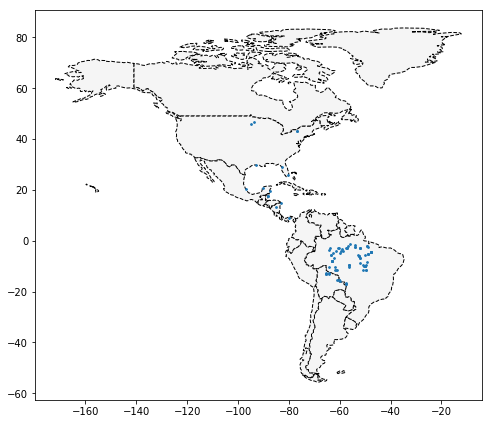

In [80]:
# Your code here
# world
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle='--', edgecolor='black')
# birds
birds.plot(markersize=3, ax=ax)

# Uncomment to see a hint
#q_2.hint()

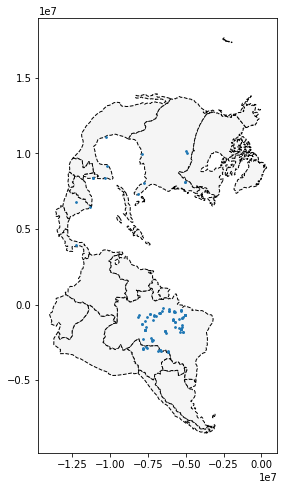

In [81]:
# try different projection
PROJECTION_CODE = 32630
ax2 = americas.to_crs(epsg=PROJECTION_CODE).plot(figsize=(8,8), color='whitesmoke', linestyle='--', edgecolor='black')
birds.to_crs(epsg=32630).plot(markersize=3, ax=ax2)
# just awful result, see?

In [82]:
# Get credit for your work after you have created a map
q_2.check()

# Uncomment to see our solution (your code may look different!)
##q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

In [83]:
# 關於geometry的方法及屬性?
print(
    [attr for attr in dir(birds.geometry)
          if attr not in dir(birds_df.geometry)]
)
# Point : 事件中心, 震央
# LineString : 街道, 路線
# Polygon : 邊界, 城市邊界, 國家邊界, 
# x, y
# 我們可以看到GeoDataFrame的geometry特有的屬性, 
# 例如 x, y, area, boundry, length, has_z...等等

['__geo_interface__', '_generate_sindex', '_invalidate_sindex', '_sindex', '_sindex_generated', '_wrapped_pandas_method', 'area', 'boundary', 'bounds', 'buffer', 'cascaded_union', 'centroid', 'contains', 'convex_hull', 'crosses', 'cx', 'difference', 'disjoint', 'distance', 'envelope', 'exterior', 'from_file', 'geom_almost_equals', 'geom_equals', 'geom_equals_exact', 'geom_type', 'geometry', 'has_z', 'interiors', 'intersection', 'intersects', 'is_empty', 'is_ring', 'is_simple', 'is_valid', 'length', 'overlaps', 'project', 'relate', 'representative_point', 'rotate', 'scale', 'select', 'simplify', 'sindex', 'symmetric_difference', 'to_crs', 'to_file', 'total_bounds', 'touches', 'translate', 'type', 'unary_union', 'union', 'within', 'x', 'y']


### 3) Where does each bird start and end its journey? (Part 1)

Now, we're ready to look more closely at each bird's path.  Run the next code cell to create two GeoDataFrames:
- `path_gdf` contains LineString objects that show the path of each bird.  It uses the `LineString()` method to create a LineString object from a list of Point objects.
- `start_gdf` contains the starting points for each bird.

In [84]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.1299245 20.7324163)
1,30054,POINT (-93.60860759999998 46.50563020000001)
2,30198,POINT (-80.3103606 25.9254455)
3,30263,POINT (-76.78146219999998 42.992085)
4,30275,POINT (-76.78213459999998 42.9920688)


Use the next code cell to create a GeoDataFrame `end_gdf` containing the final location of each bird.  
- The format should be identical to that of `start_gdf`, with two columns ("tag-local-identifier" and "geometry"), where the "geometry" column contains Point objects.
- Set the CRS of `end_gdf` to `{'init': 'epsg:4326'}`.

In [85]:
# Your code here
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [86]:
# Lines below will give you a hint or solution code
q_3.hint()
#q_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> The code that you need to write is very similar to the code that was used to create `start_gdf`.

### 4) Where does each bird start and end its journey? (Part 2)

Use the GeoDataFrames from the question above (`path_gdf`, `start_gdf`, and `end_gdf`) to visualize the paths of all birds on a single map.  You may also want to use the `americas` GeoDataFrame.

In [87]:
# display(len(start_df),
#        len(path_df),
#        len(end_df),
#        len(start_gdf),
#        len(path_gdf),
#        len(end_gdf))

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `plot()` method of each GeoDataFrame.

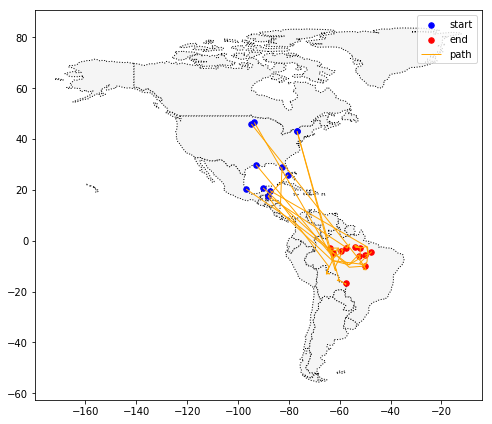

In [88]:
from matplotlib import pyplot as plt

# Your code here
# map
# Your code here
# world
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
# start
start_gdf.plot(markersize=30, label='start', c='blue', ax=ax)
# end
end_gdf.plot(markersize=30, label='end', c='red', ax=ax)
# path
path_gdf.plot(label='path', color='orange',linestyle='-',linewidth=1,ax=ax)
# legend
plt.legend()
# Uncomment to see a hint
q_4.hint()


# Uncomment to see a hint
#q_4.hint()

In [89]:
# Get credit for your work after you have created a map
q_4.check()

# Uncomment to see our solution (your code may look different!)
q_4.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

```

### 5) Where are the protected areas in South America? (Part 1)

It looks like all of the birds end up somewhere in South America.  But are they going to protected areas?

In the next code cell, you'll create a GeoDataFrame `protected_areas` containing the locations of all of the protected areas in South America.  The corresponding shapefile is located at filepath `protected_filepath`.

In [90]:
# Path of the shapefile to load
protected_filepath = "../input/geospatial-learn-course-data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

# Your code here
protected_areas = gpd.read_file(protected_filepath)

# Check your answer
q_5.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [91]:
# Lines below will give you a hint or solution code
#q_5.hint()
#q_5.solution()

### 6) Where are the protected areas in South America? (Part 2)

Create a plot that uses the `protected_areas` GeoDataFrame to show the locations of the protected areas in South America.  (_You'll notice that some protected areas are on land, while others are in marine waters._)

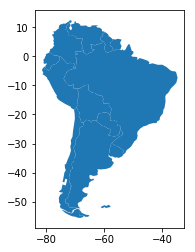

In [92]:
# Country boundaries in South America
south_america = americas.loc[americas['continent']=='South America']

# Your code here: plot protected areas in South America
south_america.to_crs(epsg=4326).plot()

# Uncomment to see a hint
#q_6.hint()

In [93]:
# Get credit for your work after you have created a map
q_6.check()

# Uncomment to see our solution (your code may look different!)
#q_6.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 7) What percentage of South America is protected?

You're interested in determining what percentage of South America is protected, so that you know how much of South America is suitable for the birds.  

As a first step, you calculate the total area of all protected lands in South America (not including marine area).  To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.

Run the code cell below without changes.

In [94]:
display(protected_areas.head(),
       protected_areas.columns)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,POLYGON ((-69.97522929999991 12.47379170000005...
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,POLYGON ((-70.04734408099995 12.56328632900005...
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,(POLYGON ((-69.96301831099993 12.4838379370000...
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,POLYGON ((-68.59060312299994 -14.4338807819999...
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,POLYGON ((-69.20949013199993 -14.7333402819999...


Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'geometry'],
      dtype='object')

In [95]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


Then, to finish the calculation, you'll use the `south_america` GeoDataFrame.  

In [96]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...
10,17789267,South America,Chile,CHL,436100.0,(POLYGON ((-68.63401022758323 -52.636370458874...
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
28,3360148,South America,Uruguay,URY,73250.0,POLYGON ((-57.62513342958296 -30.2162948544542...
29,207353391,South America,Brazil,BRA,3081000.0,POLYGON ((-53.37366166849824 -33.7683777809007...


Calculate the total area of South America by following these steps:
- Calculate the area of each country using the `area` attribute of each polygon (with EPSG 3035 as the CRS), and add up the results.  The calculated area will be in units of square meters.
- Convert your answer to have units of square kilometeters.

根據特定國家，有特定的編碼方式來符合政府規範，這裡在南美洲使用3035, 台灣的話，可以參考[台灣常用的 EPSG代碼](http://gis.rchss.sinica.edu.tw/qgis/?p=2823)

In [100]:
# Your code here: Calculate the total area of South America (in square kilometers)
totalArea = sum(south_america.to_crs(epsg=3035).area) / (10^6)
print(totalArea)
# print(P_Area / totalArea)
# Check your answer
q_7.check()

1479917151255.1025


<IPython.core.display.Javascript object>

<span style="color:#cc3333">Incorrect:</span> Incorrect value for `totalArea`: `1479917151255.1025`

In [101]:
# Lines below will give you a hint or solution code
q_7.hint()
#q_7.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `to_crs()` method to change the CRS to EPSG 3035.

Run the code cell below to calculate the percentage of South America that is protected.

In [102]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 0.0% of South America is protected.


### 8) Where are the birds in South America?

So, are the birds in protected areas?  

Create a plot that shows for all birds, all of the locations where they were discovered in South America.  Also plot the locations of all protected areas in South America.

To exclude protected areas that are purely marine areas (with no land component), you can use the "MARINE" column (and plot only the rows in `protected_areas[protected_areas['MARINE']!='2']`, instead of every row in the `protected_areas` GeoDataFrame).

In [ ]:
ax = americas.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
# start
start_gdf.plot(markersize=30, label='start', c='blue', ax=ax)
# end
end_gdf.plot(markersize=30, label='end', c='red', ax=ax)
# path
path_gdf.plot(label='path', color='orange',linestyle='-',linewidth=1,ax=ax)
# legend
plt.legend()

In [115]:
# birds

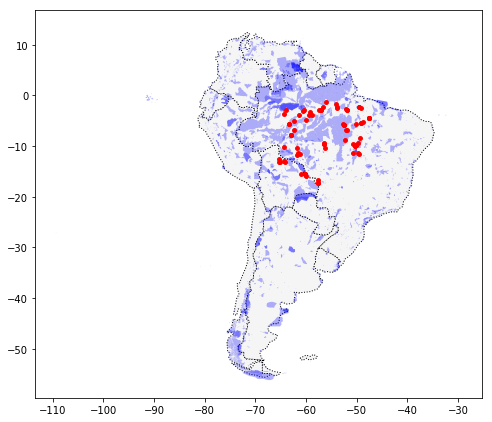

In [123]:
# prepare data
land_protected_areas = protected_areas[protected_areas['MARINE'] != '2']
birds_south = birds[birds.geometry.y < 0] # south side for all birds
# map
PROJECTION_CODE = 4326
ax = south_america.to_crs(epsg=PROJECTION_CODE).plot(figsize=(8,8), color='whitesmoke', 
                                                     linestyle=':', edgecolor='black')
# land_protected_area zorder for coverd by bird points
land_protected_areas.to_crs(epsg=PROJECTION_CODE).plot(ax=ax, color='blue', alpha=.3,
                                                       label='protected area',zorder=1)
# all the birds
birds_south.to_crs(epsg=PROJECTION_CODE).plot(ax=ax, markersize=15, color='red',
                                              label='birds',zorder=2)
plt.legend()

In [119]:
# Your code here
____

# Uncomment to see a hint
q_8.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> When in South America, the birds are south of the equator.

In [120]:
# Get credit for your work after you have created a map
q_8.check()

# Uncomment to see our solution (your code may look different!)
q_8.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)

```

# Keep going

Create stunning **[interactive maps](https://www.kaggle.com/alexisbcook/interactive-maps)** with your geospatial data.

---
**[Geospatial Analysis Home Page](https://www.kaggle.com/learn/geospatial-analysis)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*